In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [63]:
table = pd.read_csv("C:/Users/HanSAriEle/Downloads/product_sales.csv")

**ETUDE DESCRITPTIVE ET NETTOYAGE**

In [64]:
table.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [144]:
table.describe()

,week,nb_sold,years_as_customer,nb_site_visits,revenue
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.098267,10.084667,4.965933,24.990867,93.934943
std,1.656420,1.812213,5.044952,3.500914,45.705474
min,1.000000,7.000000,0.000000,12.000000,32.540000
25%,2.000000,9.000000,1.000000,23.000000,53.040000
50%,3.000000,10.000000,3.000000,25.000000,91.865000
75%,5.000000,11.000000,7.000000,27.000000,106.070000
max,6.000000,16.000000,63.000000,41.000000,238.320000


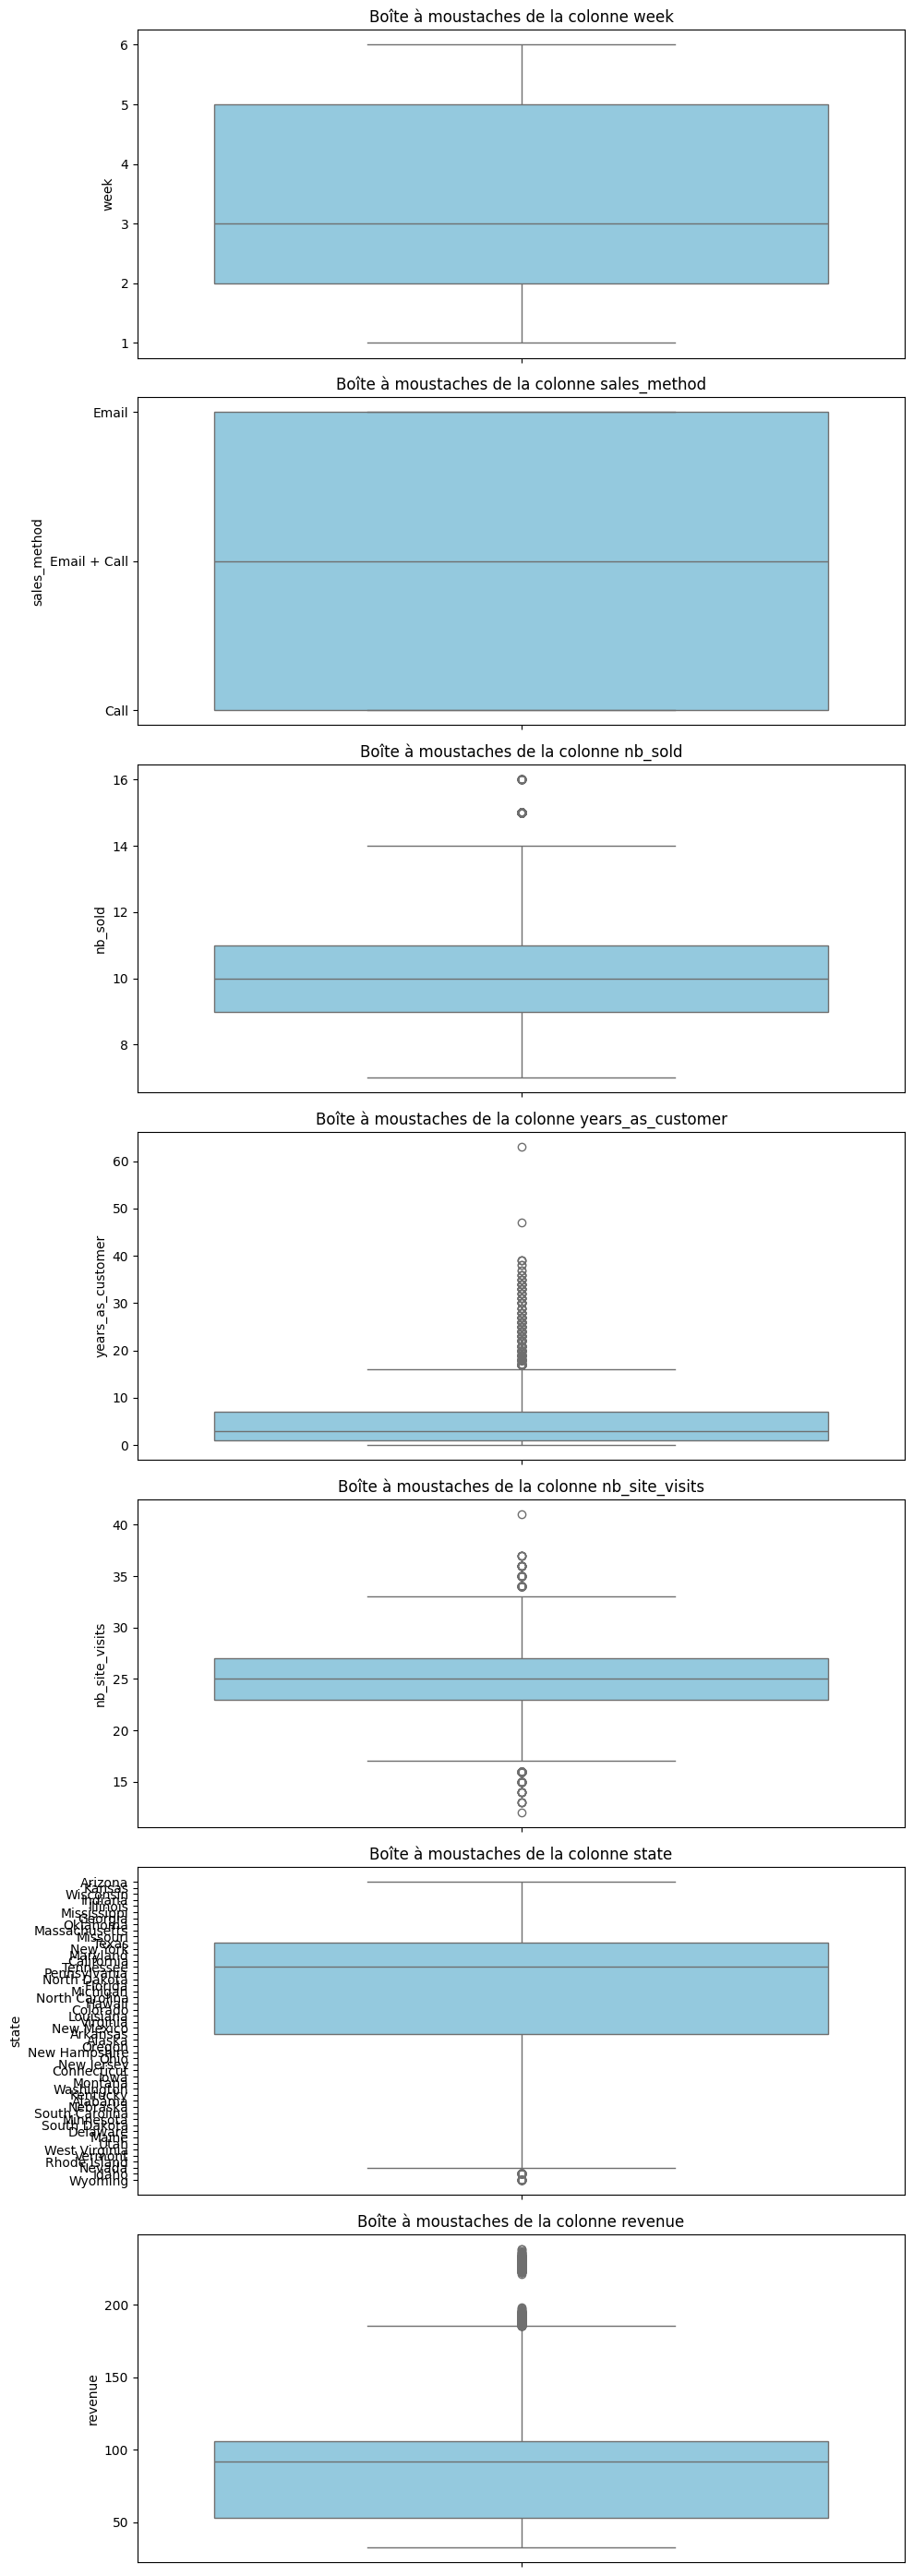

In [151]:
# Filtrer les colonnes à tracer (toutes sauf 'customer_id')
columns_to_plot = [col for col in table.columns if col != 'customer_id']

# Définir le nombre de colonnes et de lignes pour les sous-graphes
num_columns = len(columns_to_plot)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 4 * num_columns))

# Créer un boxplot pour chaque colonne sur une même figure
for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=table[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f'Boîte à moustaches de la colonne {col}')
    axes[i].set_ylabel(col)

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()
plt.show()

In [110]:
table.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
years_as_customer      int64
nb_site_visits         int64
state                 object
revenue              float64
dtype: object

In [66]:
table.columns

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [67]:
table.shape

(15000, 8)

In [68]:
table.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [80]:
for col in table.columns :
    print(col, ':', table[col].unique())

week : [2 6 5 4 3 1]
sales_method : ['Email' 'Email + Call' 'Call']
customer_id : ['2e72d641-95ac-497b-bbf8-4861764a7097'
 '3998a98d-70f5-44f7-942e-789bb8ad2fe7'
 'd1de9884-8059-4065-b10f-86eef57e4a44' ...
 '839653cb-68c9-48cb-a097-0a5a3b2b298b'
 'e4dad70a-b23b-407c-8bd3-e32ea00fae17'
 '4e077235-7c17-4054-9997-7a890336a214']
nb_sold : [10 15 11  9 13  8 12  7 14 16]
years_as_customer : [ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 39 25 33 21 31 27 34 28 29 35 38 37 63 47]
nb_site_visits : [24 28 26 25 22 31 23 30 21 27 32 29 20 18 19 35 16 17 33 36 34 15 37 14
 13 12 41]
state : ['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecti

In [70]:
table.replace({'sales_method': {'em + call': 'Email + Call', 'email' : 'Email'}}, inplace=True)

In [71]:
table['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

**TRAITEMENT DES VALEURS MANQUANTES**

In [72]:
# Créer un imputer IterativeImputer avec une stratégie de 'mean'
imputer = IterativeImputer(max_iter=10, random_state=0, sample_posterior=True)

# Imputer les colonnes 'total_protein', 'rectal_temp' et 'pulse' de la DataFrame df
table_imputed = pd.DataFrame(imputer.fit_transform(table[['revenue']]), columns=['revenue_imputed'])

# Concaténer la DataFrame imputée avec la DataFrame originale
table = pd.concat([table, table_imputed], axis=1)
table.isnull().mean()

week                 0.0000
sales_method         0.0000
customer_id          0.0000
nb_sold              0.0000
revenue              0.0716
years_as_customer    0.0000
nb_site_visits       0.0000
state                0.0000
revenue_imputed      0.0000
dtype: float64

In [73]:
table.drop(columns = ['revenue'], inplace = True)

In [82]:
table.columns

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'years_as_customer',
       'nb_site_visits', 'state', 'revenue'],
      dtype='object')

In [75]:
table.rename(columns={'revenue_imputed' : 'revenue'}, inplace = True)

**ANALYSES UNIVARIEES**

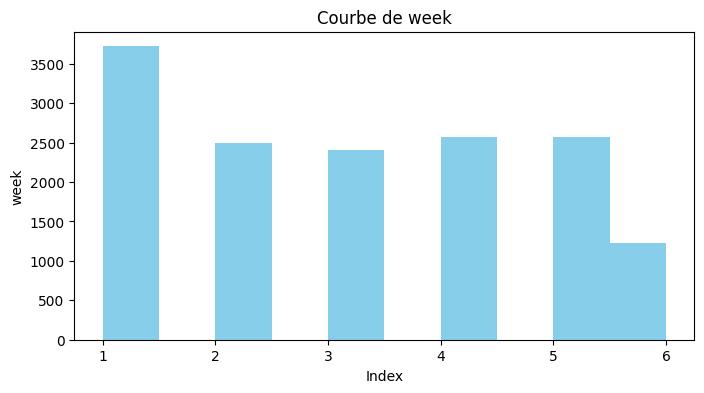

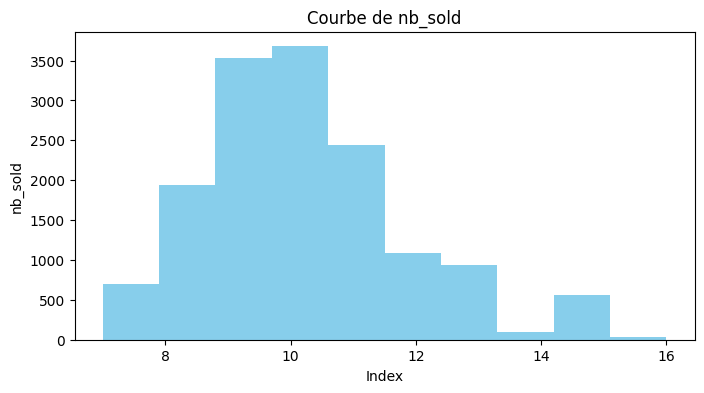

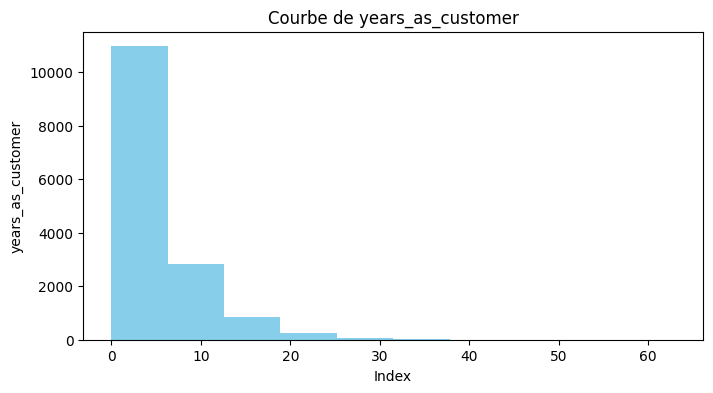

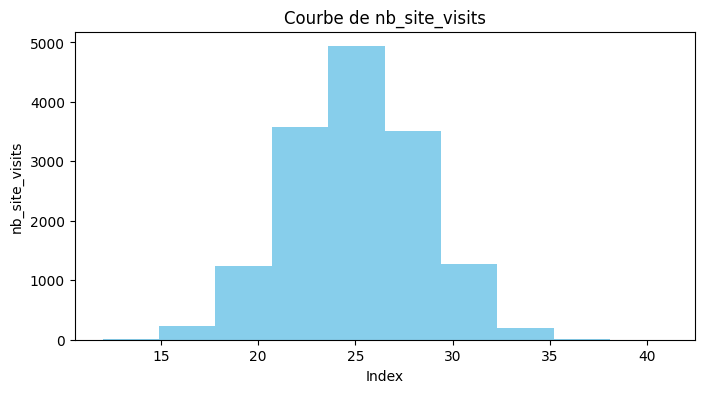

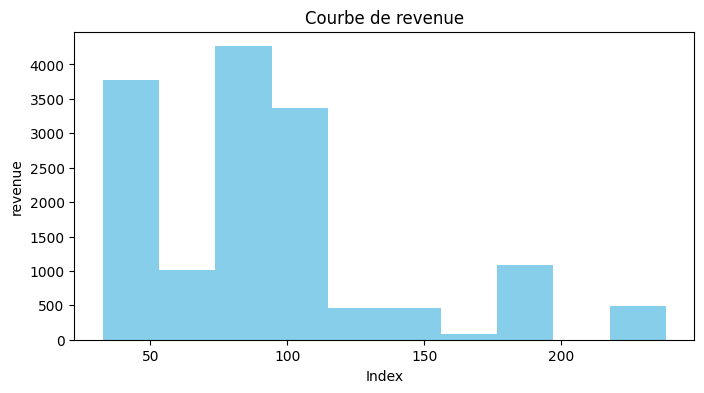

In [153]:
for col in table.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))  # Ajustez la taille selon vos besoins
    table[col].plot(kind='hist', color='skyblue')
    plt.title(f"Courbe de {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.show()

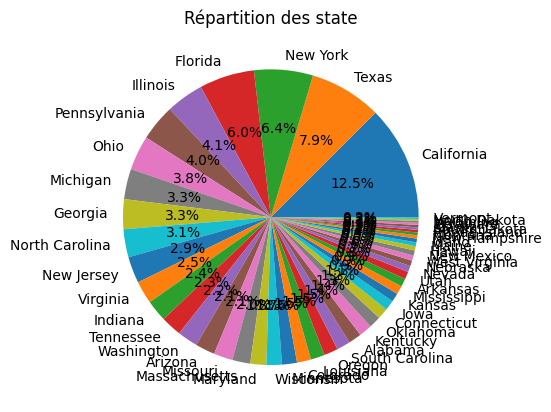

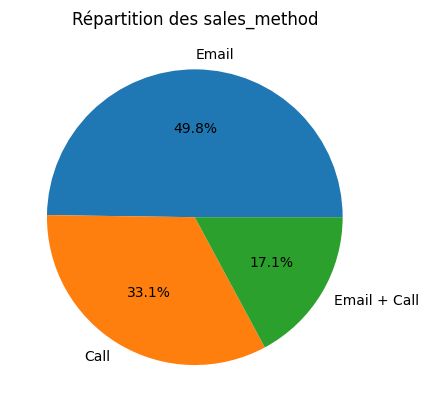

In [120]:
for col in ['state', 'sales_method'] :
    table[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f"Répartition des {col}")
    plt.ylabel("")  # Pour ne pas afficher l'étiquette de l'axe Y
    plt.show()

**ANALYSES BIVARIEES**

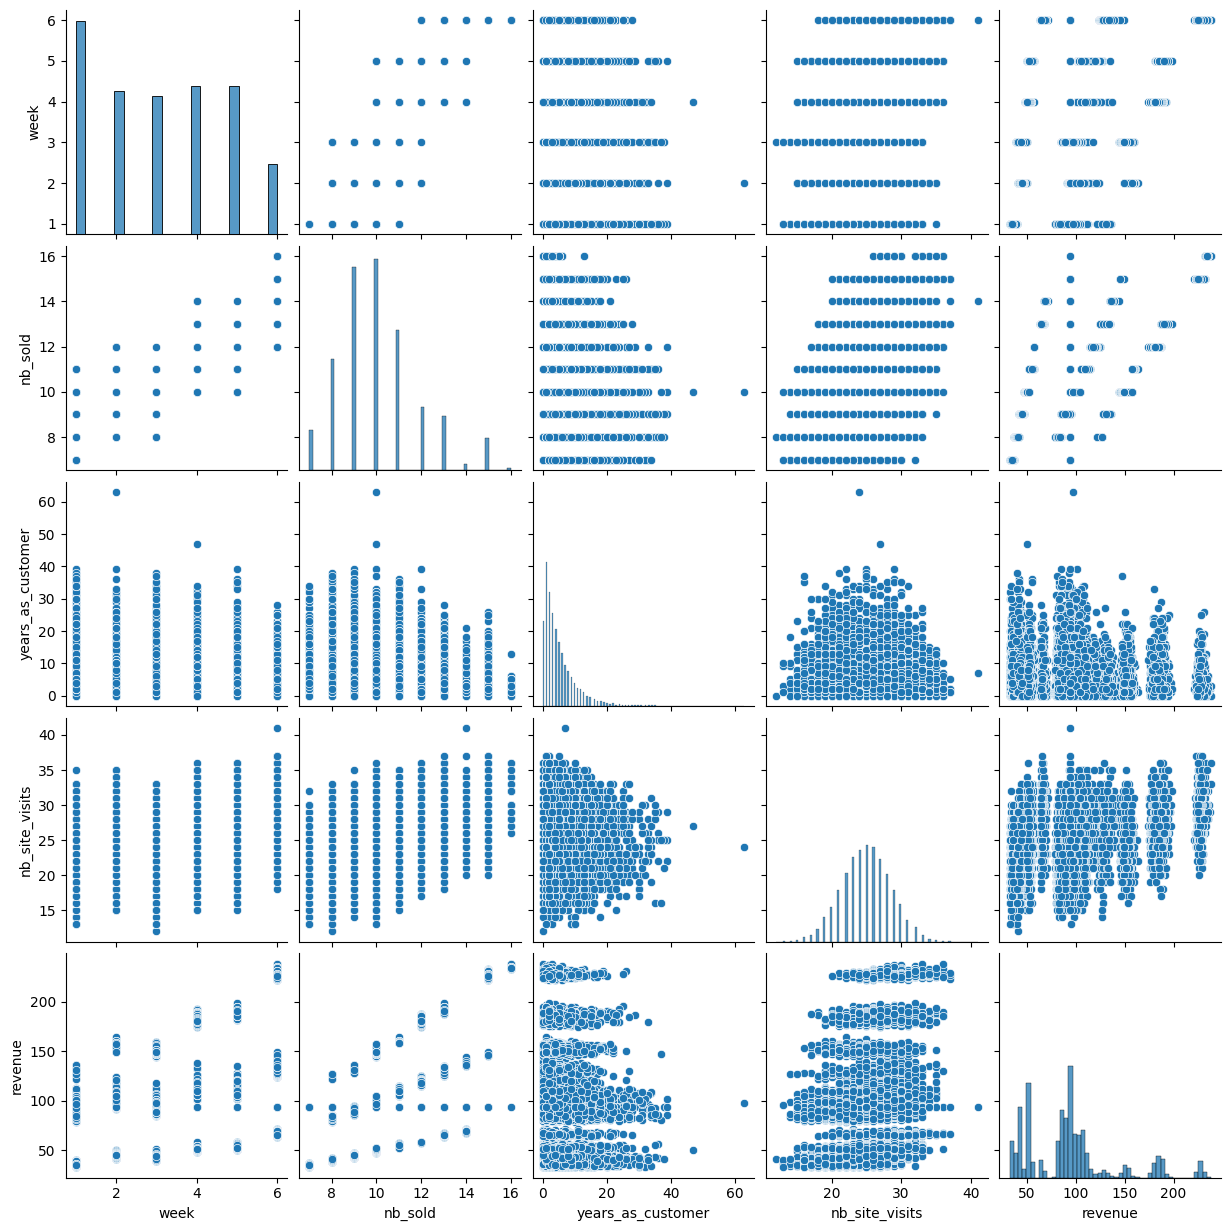

In [91]:
sns.pairplot(table.drop(columns = ['state', 'customer_id', 'sales_method']))

In [90]:
# Sélectionner uniquement les colonnes numériques
table_num = table.select_dtypes(include=[np.number])

# Calculer la corrélation de Spearman
correlation_spearman = table_num.corr(method='spearman')

# Afficher le résultat
correlation_spearman

,week,nb_sold,years_as_customer,nb_site_visits,revenue
week,1.000000,0.814178,-0.086915,0.414200,0.315599
nb_sold,0.814178,1.000000,-0.105409,0.485118,0.637867
years_as_customer,-0.086915,-0.105409,1.000000,-0.049935,-0.073005
nb_site_visits,0.414200,0.485118,-0.049935,1.000000,0.314776
revenue,0.315599,0.637867,-0.073005,0.314776,1.000000


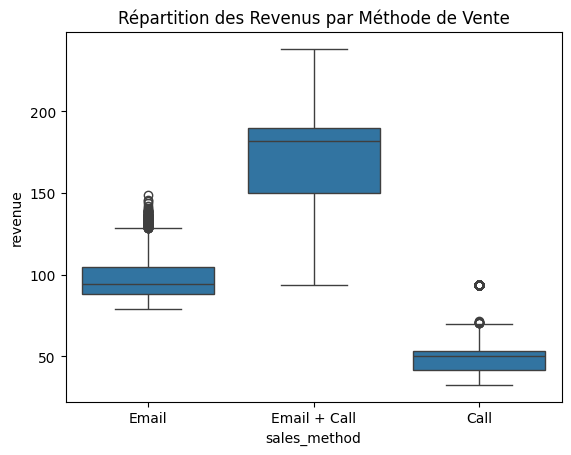

In [131]:
# Boxplot 1 : Méthode de vente vs Revenu
sns.boxplot(x='sales_method', y='revenue', data=table)
plt.title("Répartition des Revenus par Méthode de Vente")
plt.show()

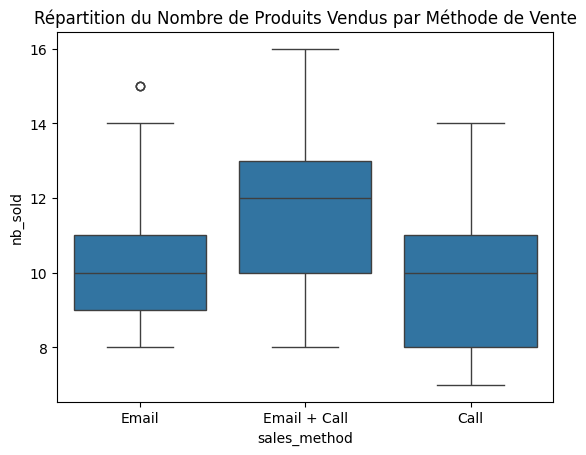

In [132]:
# Boxplot 2 : Méthode de vente vs Nombre de produits vendus
sns.boxplot(x='sales_method', y='nb_sold', data=table)
plt.title("Répartition du Nombre de Produits Vendus par Méthode de Vente")
plt.show()

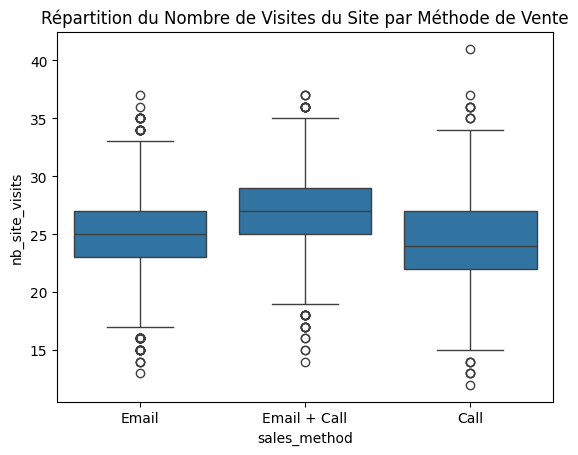

In [133]:
# Boxplot 3 : Méthode de vente vs Nombre de visites du site
sns.boxplot(x='sales_method', y='nb_site_visits', data=table)
plt.title("Répartition du Nombre de Visites du Site par Méthode de Vente")
plt.show()

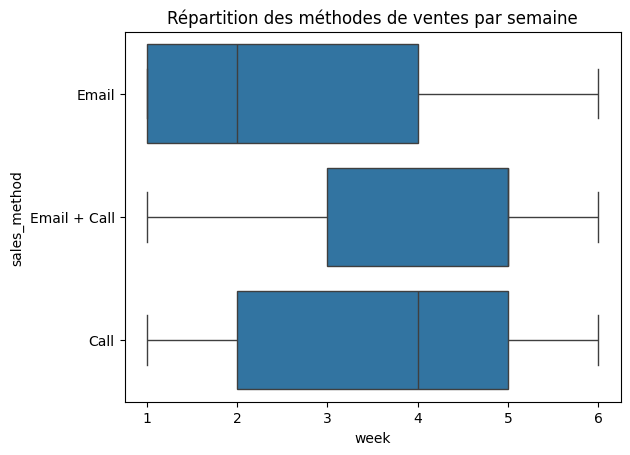

In [147]:
# Boxplot 4 : Semaine vs Nombre de visites du site
sns.boxplot(x='week', y='sales_method', data=table)
plt.title("Répartition des méthodes de ventes par semaine")
plt.show()

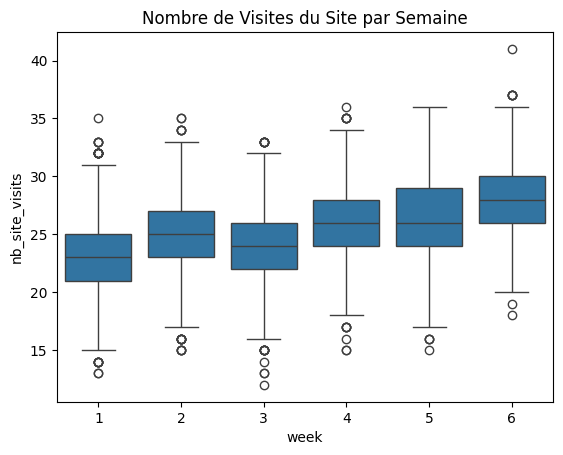

In [134]:
# Boxplot 4 : Semaine vs Nombre de visites du site
sns.boxplot(x='week', y='nb_site_visits', data=table)
plt.title("Nombre de Visites du Site par Semaine")
plt.show()

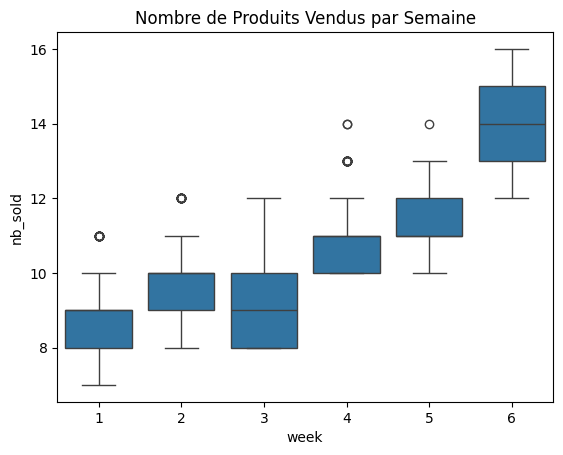

In [135]:
# Boxplot 5 : Semaine vs Nombre de produits vendus
sns.boxplot(x='week', y='nb_sold', data=table)
plt.title("Nombre de Produits Vendus par Semaine")
plt.show()

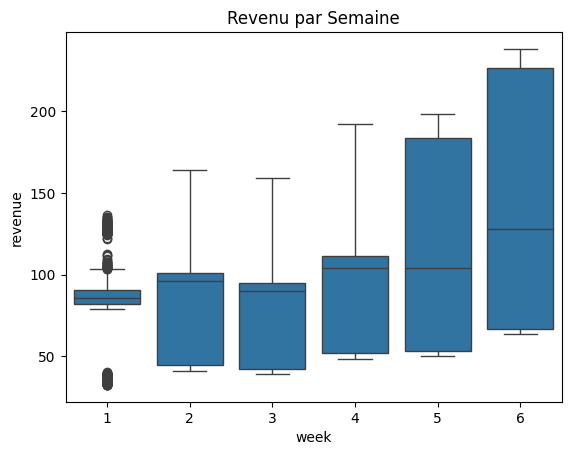

In [136]:
# Boxplot 6 : Semaine vs Revenu
sns.boxplot(x='week', y='revenue', data=table)
plt.title("Revenu par Semaine")
plt.show()

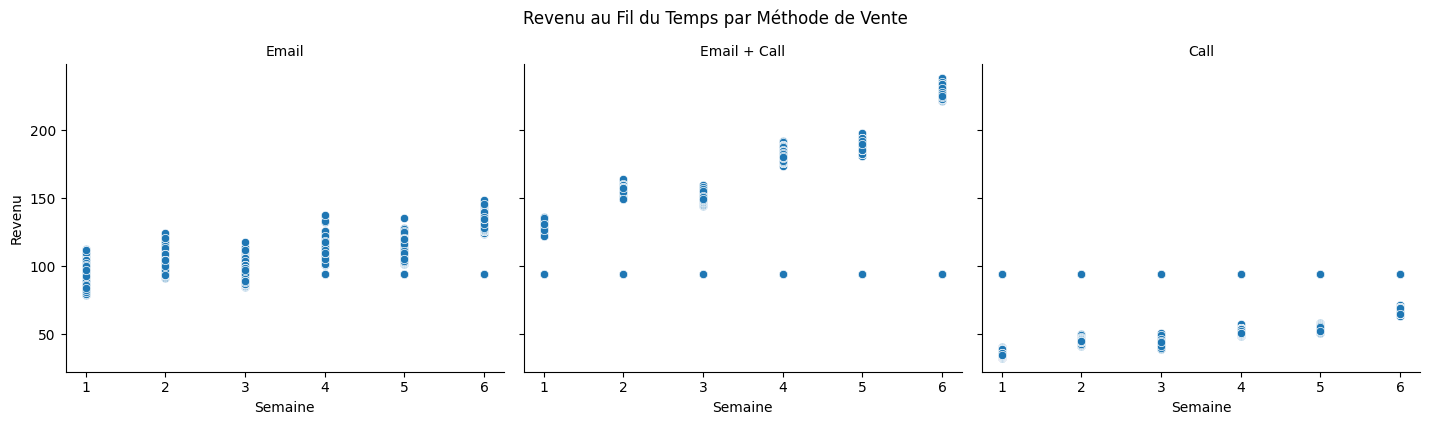

In [100]:
g = sns.FacetGrid(table, col='sales_method', height=4, aspect=1.2)
g.map(sns.scatterplot, 'week', 'revenue')
g.set_axis_labels("Semaine", "Revenu")
g.set_titles("{col_name}")
plt.suptitle("Revenu au Fil du Temps par Méthode de Vente", y=1.05)
plt.show()

In [104]:
table['state'].nunique()

50

In [105]:
# Compter le nombre de clients pour chaque méthode de vente
nombre_clients_par_methode = table['sales_method'].value_counts()

print(nombre_clients_par_methode)

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64


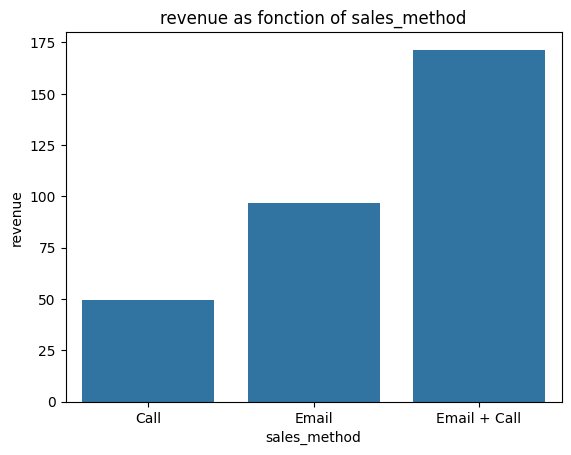

In [167]:
# Calculer le revenu moyen pour chaque méthode de vente
revenu_moyen_par_methode = table.groupby('sales_method')['revenue'].mean().reset_index()
revenu_moyen_par_methode.columns = ['sales_method', 'revenue']

# Créer un barplot
sns.barplot(x='sales_method', y='revenue', data=revenu_moyen_par_methode)

# Ajouter le titre et les labels
plt.title("revenue as fonction of sales_method")
plt.xlabel("sales_method")
plt.ylabel("revenue")

# Afficher le graphique
plt.show()


In [115]:
table[table['customer_id'].duplicated()]

,week,sales_method,customer_id,nb_sold,years_as_customer,nb_site_visits,state,revenue


In [118]:
table[table['years_as_customer'] < 0]

,week,sales_method,customer_id,nb_sold,years_as_customer,nb_site_visits,state,revenue


In [119]:
table['state'].unique()

array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
       'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
       'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
       'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
       'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
       'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
       'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
       'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
       'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
       'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
       'Wyoming'], dtype=object)

In [137]:
table[table['nb_site_visits']== 25]

,week,sales_method,customer_id,nb_sold,years_as_customer,nb_site_visits,state,revenue
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,3,25,Indiana,93.934943
20,1,Email,ad1d8be5-aa0a-41e1-bbc6-7889b4a14521,9,4,25,Texas,90.510000
37,5,Email,8e42cbad-8088-440c-b990-13989b7365d2,11,1,25,Louisiana,111.880000
42,3,Email,0fe31def-6ac2-4559-ba9a-23d65078eabf,9,3,25,California,86.510000
51,3,Email,e5acd291-0606-4224-98dd-1d0cbdb0e51b,10,8,25,New York,98.280000
...,...,...,...,...,...,...,...,...
14971,1,Email,7c0b402b-bd80-4817-baf2-e7a1d1776b82,9,3,25,Washington,92.530000
14979,4,Email,de9a4735-aa16-470a-87f5-b518e184469b,11,9,25,Oregon,112.010000
14986,3,Call,aaa8e5b8-a334-43a8-a55f-fe6197300e93,9,3,25,Missouri,44.340000
14994,4,Email,56f02e26-3633-427d-8c4e-f45f00afa787,11,3,25,Ohio,109.360000


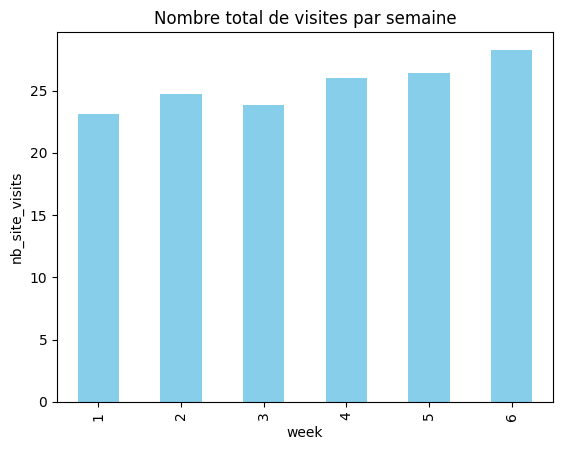

In [155]:
# Regrouper les visites par semaine et calculer la somme
visits_per_week = table.groupby('week')['nb_site_visits'].mean()

# Tracer un graphique à barres
visits_per_week.plot(kind='bar', color='skyblue')
plt.title('Nombre moyen de visites par semaine')
plt.xlabel('week')
plt.ylabel('nb_site_visits')
plt.show()

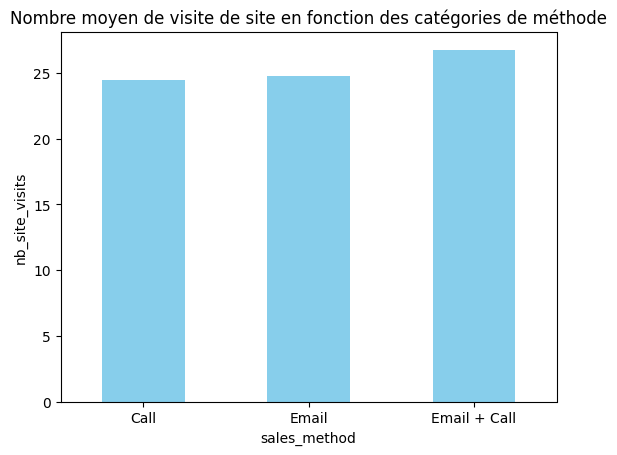

In [178]:
# Regrouper les visites par semaine et calculer la somme
visits_per_week = table.groupby('sales_method')['nb_site_visits'].mean()

# Tracer un graphique à barres
visits_per_week.plot(kind='bar', color='skyblue')
plt.title('Nombre moyen de visite de site en fonction des catégories de méthode')
plt.xlabel('sales_method')
plt.ylabel('nb_site_visits')
plt.xticks(rotation=0)
plt.show()

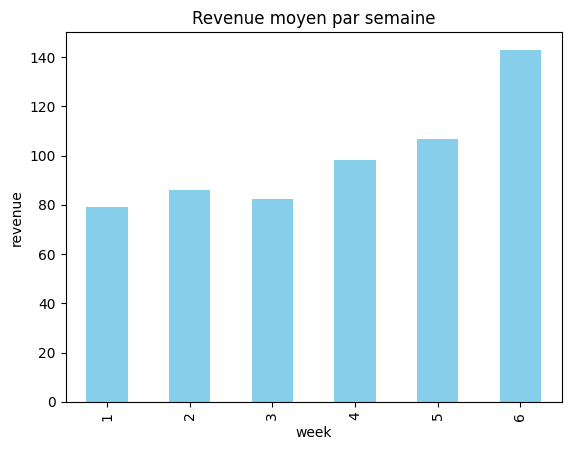

In [159]:
# Regrouper les visites par semaine et calculer la somme
visits_per_week = table.groupby('week')['revenue'].mean()

# Tracer un graphique à barres
visits_per_week.plot(kind='bar', color='skyblue')
plt.title('Revenue moyen par semaine')
plt.xlabel('week')
plt.ylabel('revenue')
plt.show()

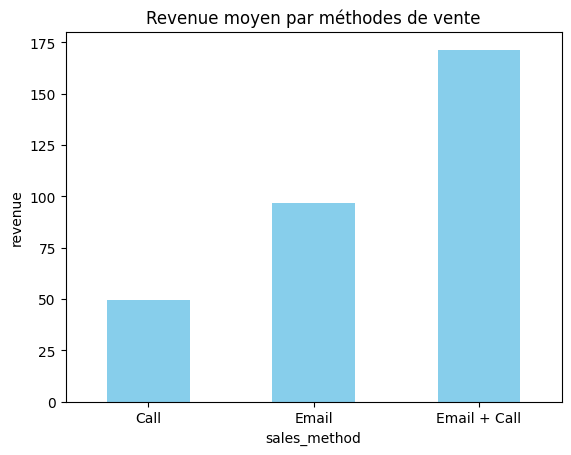

In [179]:
visits_per_week = table.groupby('sales_method')['revenue'].mean()

# Tracer un graphique à barres
visits_per_week.plot(kind='bar', color='skyblue')
plt.title('Revenue moyen par méthodes de vente')
plt.xlabel('sales_method')
plt.ylabel('revenue')
plt.xticks(rotation = 0)
plt.show()

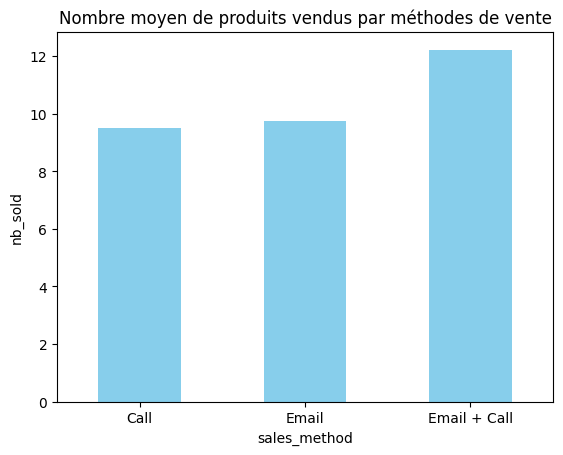

In [180]:
visits_per_week = table.groupby('sales_method')['nb_sold'].mean()

# Tracer un graphique à barres
visits_per_week.plot(kind='bar', color='skyblue')
plt.title('Nombre moyen de produits vendus par méthodes de vente')
plt.xlabel('sales_method')
plt.ylabel('nb_sold')
plt.xticks(rotation = 0)
plt.show()

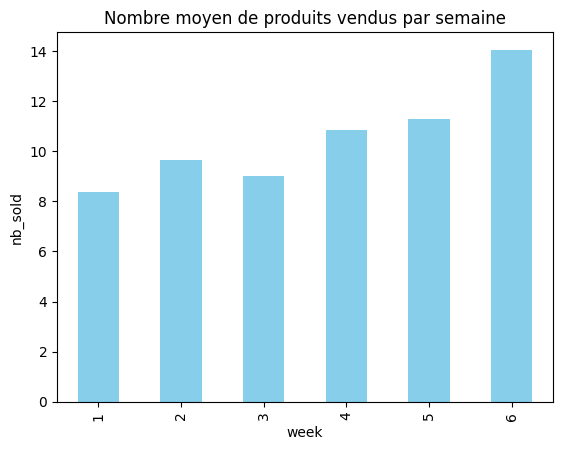

In [162]:
visits_per_week = table.groupby('week')['nb_sold'].mean()

# Tracer un graphique à barres
visits_per_week.plot(kind='bar', color='skyblue')
plt.title('Nombre moyen de produits vendus par semaine')
plt.xlabel('week')
plt.ylabel('nb_sold')
plt.show()

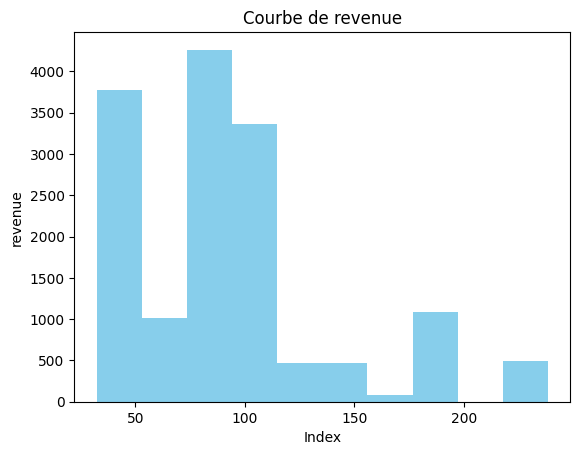

In [176]:
table['revenue'].plot(kind='hist', color='skyblue')
plt.title(f"Courbe de revenue")
plt.xlabel("Index")
plt.ylabel('revenue')
plt.show()

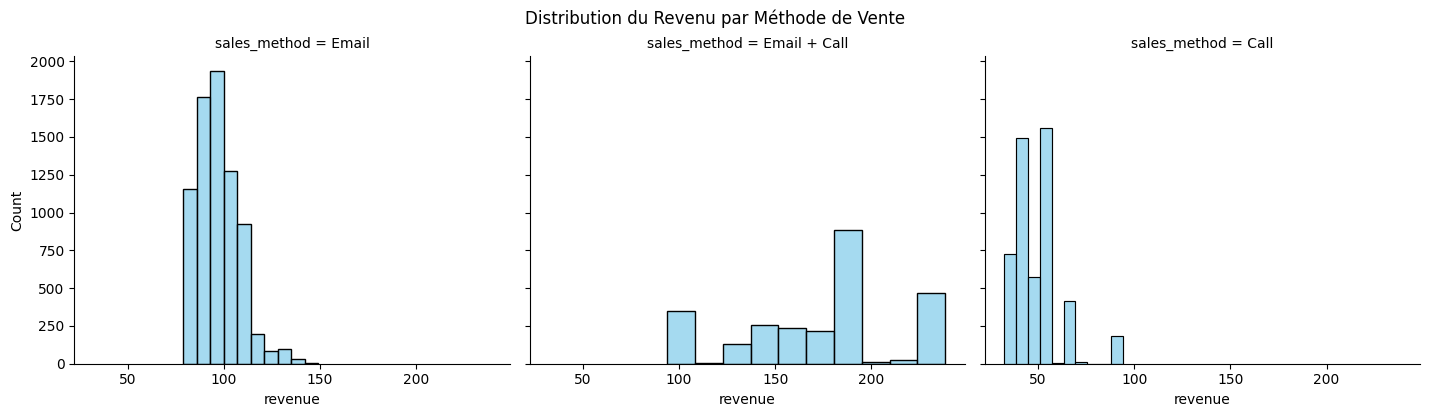

In [177]:
# Créer un FacetGrid pour les histogrammes de la distribution des revenus par méthode de vente
g = sns.FacetGrid(table, col="sales_method", height=4, aspect=1.2)
g.map(sns.histplot, "revenue", bins=10, color="skyblue")

# Ajouter un titre global
g.fig.suptitle("Distribution du Revenu par Méthode de Vente", y=1.03)

# Afficher les graphiques
plt.show()